# Machine Learning Project

## MNIST Dataset

In [2]:
import pandas as pd
import numpy as np
from mnist import MNIST
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns
from utils import show_image

## 1 - Lendo os dados de treino

In [4]:
mnist = MNIST('datasets/mnist')
train_images, train_labels = mnist.load_training()
test_images, test_labels = mnist.load_testing()

shape = (28,28)

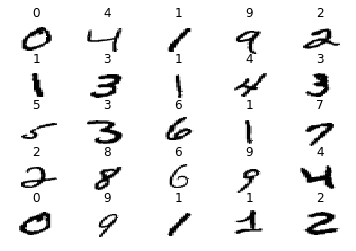

In [5]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(1,26):
    ax = fig.add_subplot(5, 5, i)
    ax.set_title(train_labels[i])
    show_image(train_images[i],shape, ax=ax)

# 2 - Random Classifier

**First, we will build a random classifier as a baseline**

 - Lets see how many examples we have in each class

In [6]:
pd.DataFrame(list(train_labels),columns=['class']).groupby(by='class').size()

class
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
dtype: int64

 - The plot shows the distribution of the classes in training dataset

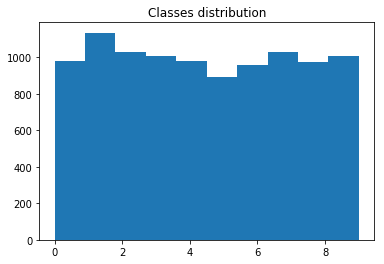

In [7]:
plt.hist(test_labels)
plt.title("Classes distribution")
plt.show()

 - Based on the distribution of the trainign dataset, we will build a random classifier

In [8]:
def random_classifier(img):
    return np.random.choice(train_labels)

 - Apply the random_classifier to test data

In [9]:
test_result = []

for i in range(len(test_images)):
    test = random_classifier(test_images[i])
    test_result.append((test_labels[i],test))

df_result = pd.DataFrame(test_result, columns = ["y","ŷ"])
df_result.head()

,y,ŷ
0,7,7
1,2,1
2,1,2
3,0,4
4,4,9


- Lets see some metrics about the classification

![pr](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png)

In [10]:
from sklearn import metrics

print(metrics.classification_report(df_result["y"],df_result["ŷ"]))

              precision    recall  f1-score   support

           0       0.09      0.09      0.09       980
           1       0.10      0.10      0.10      1135
           2       0.10      0.09      0.10      1032
           3       0.09      0.09      0.09      1010
           4       0.09      0.09      0.09       982
           5       0.09      0.10      0.09       892
           6       0.08      0.09      0.09       958
           7       0.11      0.12      0.12      1028
           8       0.11      0.11      0.11       974
           9       0.09      0.09      0.09      1009

   micro avg       0.10      0.10      0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000

